Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

Feature: MedInc
Q1: 2.5633999999999997
Q3: 4.74325
IQR: 2.17985
Outliers for MedInc:
Number of outliers: 681

Feature: HouseAge
Q1: 18.0
Q3: 37.0
IQR: 19.0
Outliers for HouseAge:
Number of outliers: 0

Feature: AveRooms
Q1: 4.440716235896959
Q3: 6.052380952380952
IQR: 1.6116647164839932
Outliers for AveRooms:
Number of outliers: 511

Feature: AveBedrms
Q1: 1.006079046038478
Q3: 1.099526066350711
IQR: 0.09344702031223284
Outliers for AveBedrms:
Number of outliers: 1424

Feature: Population
Q1: 787.0
Q3: 1725.0
IQR: 938.0
Outliers for Population:
Number of outliers: 1196

Feature: AveOccup
Q1: 2.4297411475535755
Q3: 3.2822609242736216
IQR: 0.8525197767200461
Outliers for AveOccup:
Number of outliers: 711

Feature: Latitude
Q1: 33.93
Q3: 37.71
IQR: 3.780000000000001
Outliers for Latitude:
Number of outliers: 0

Feature: Longitude
Q1: -121.8
Q3: 

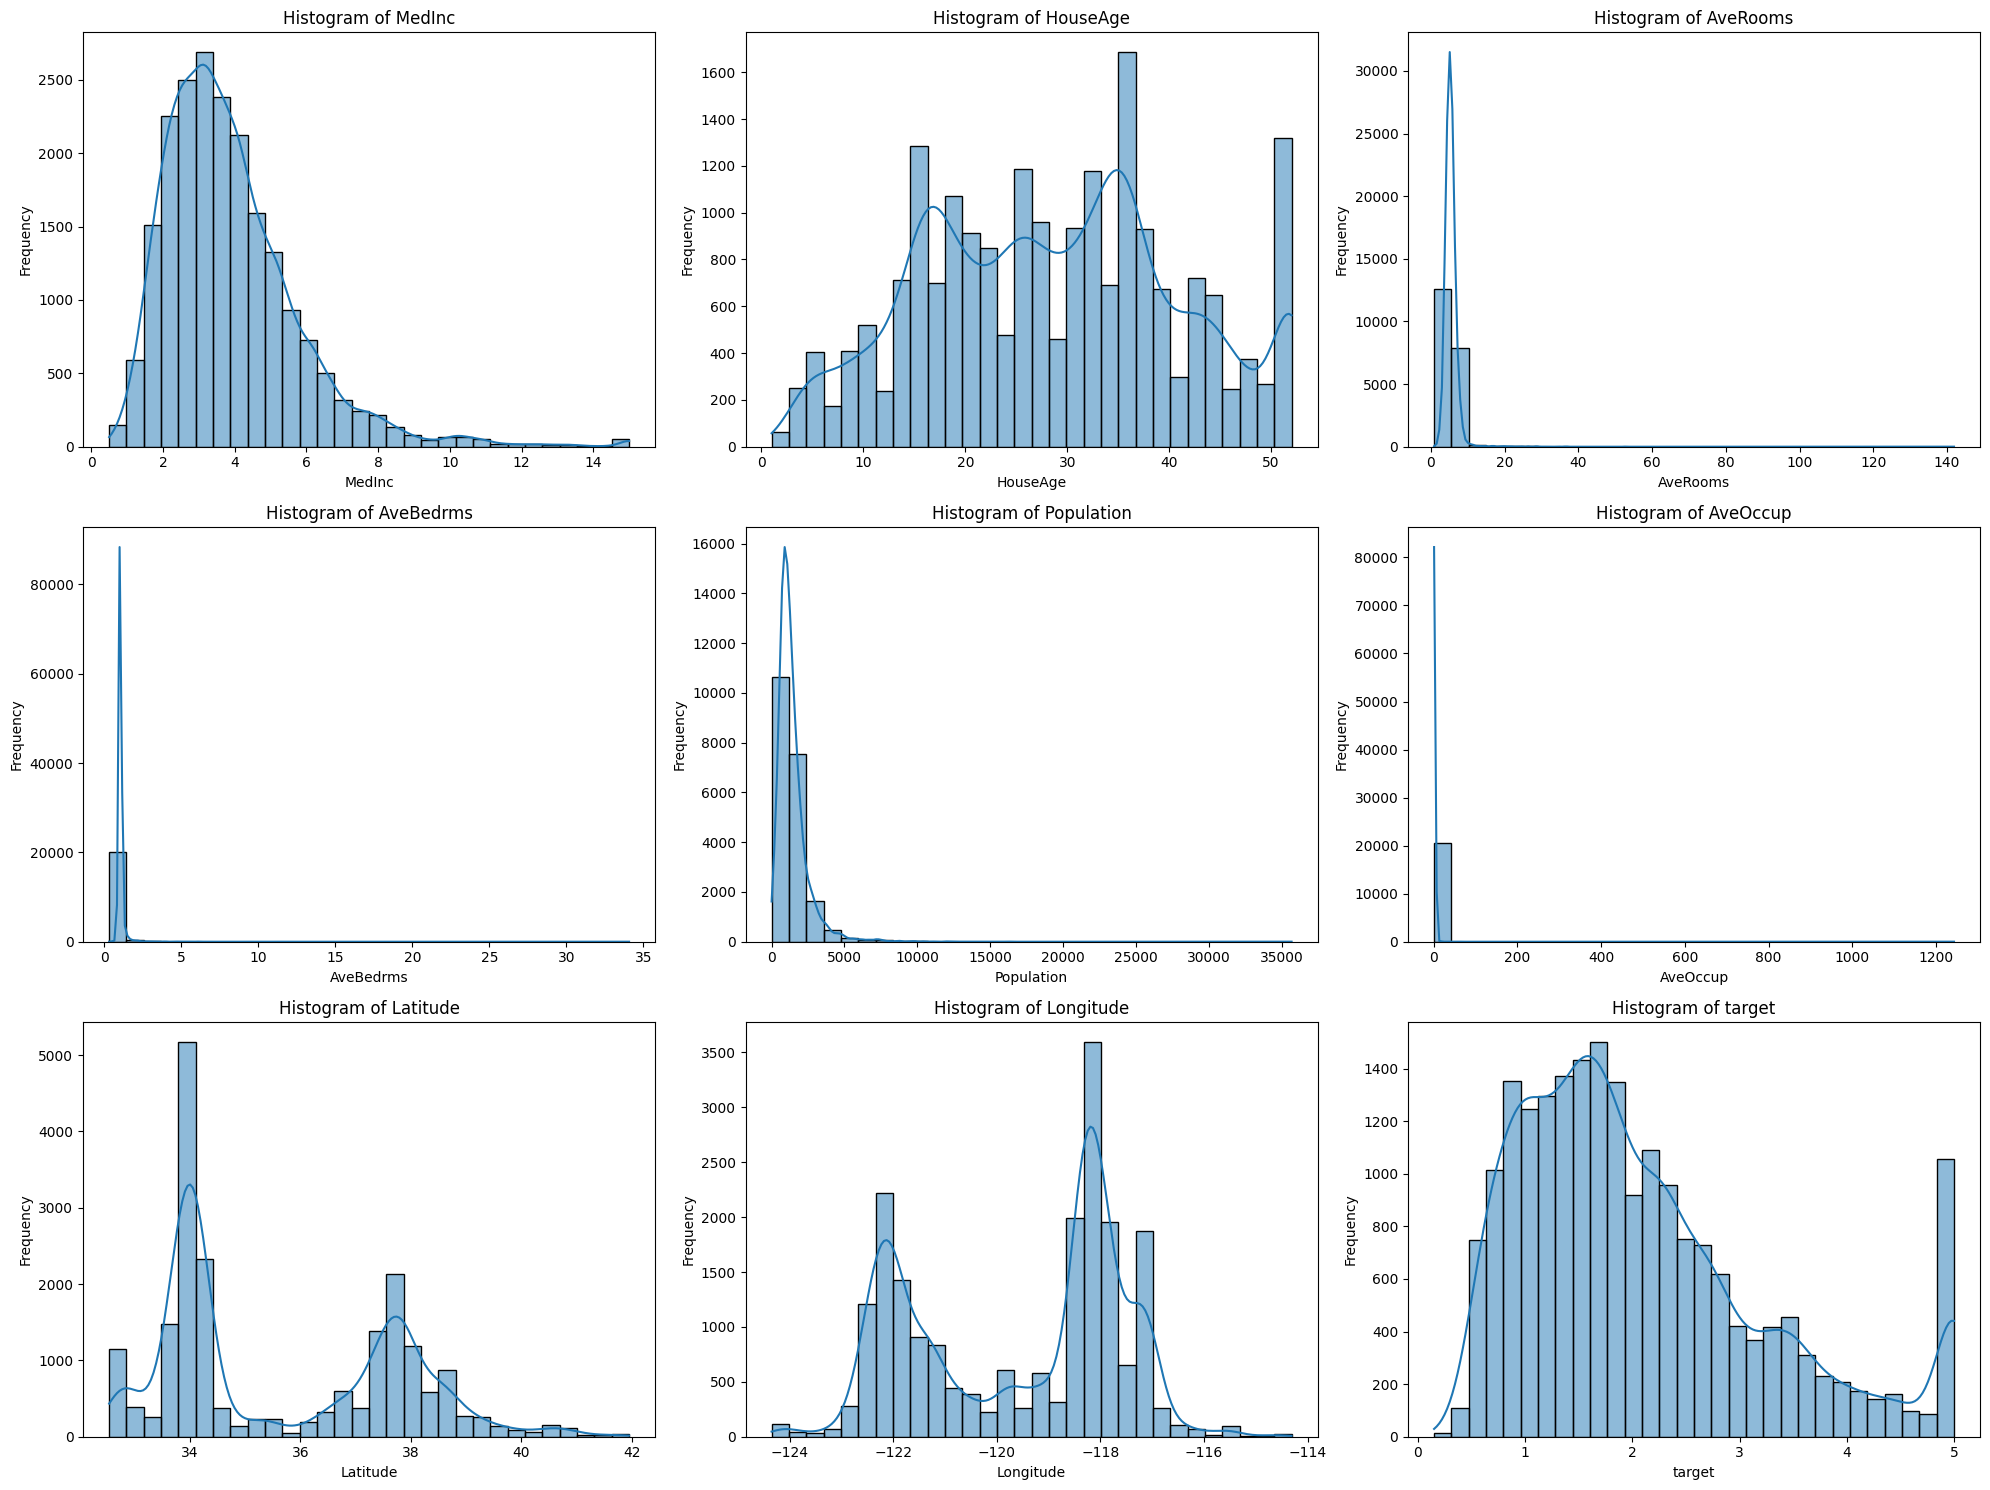

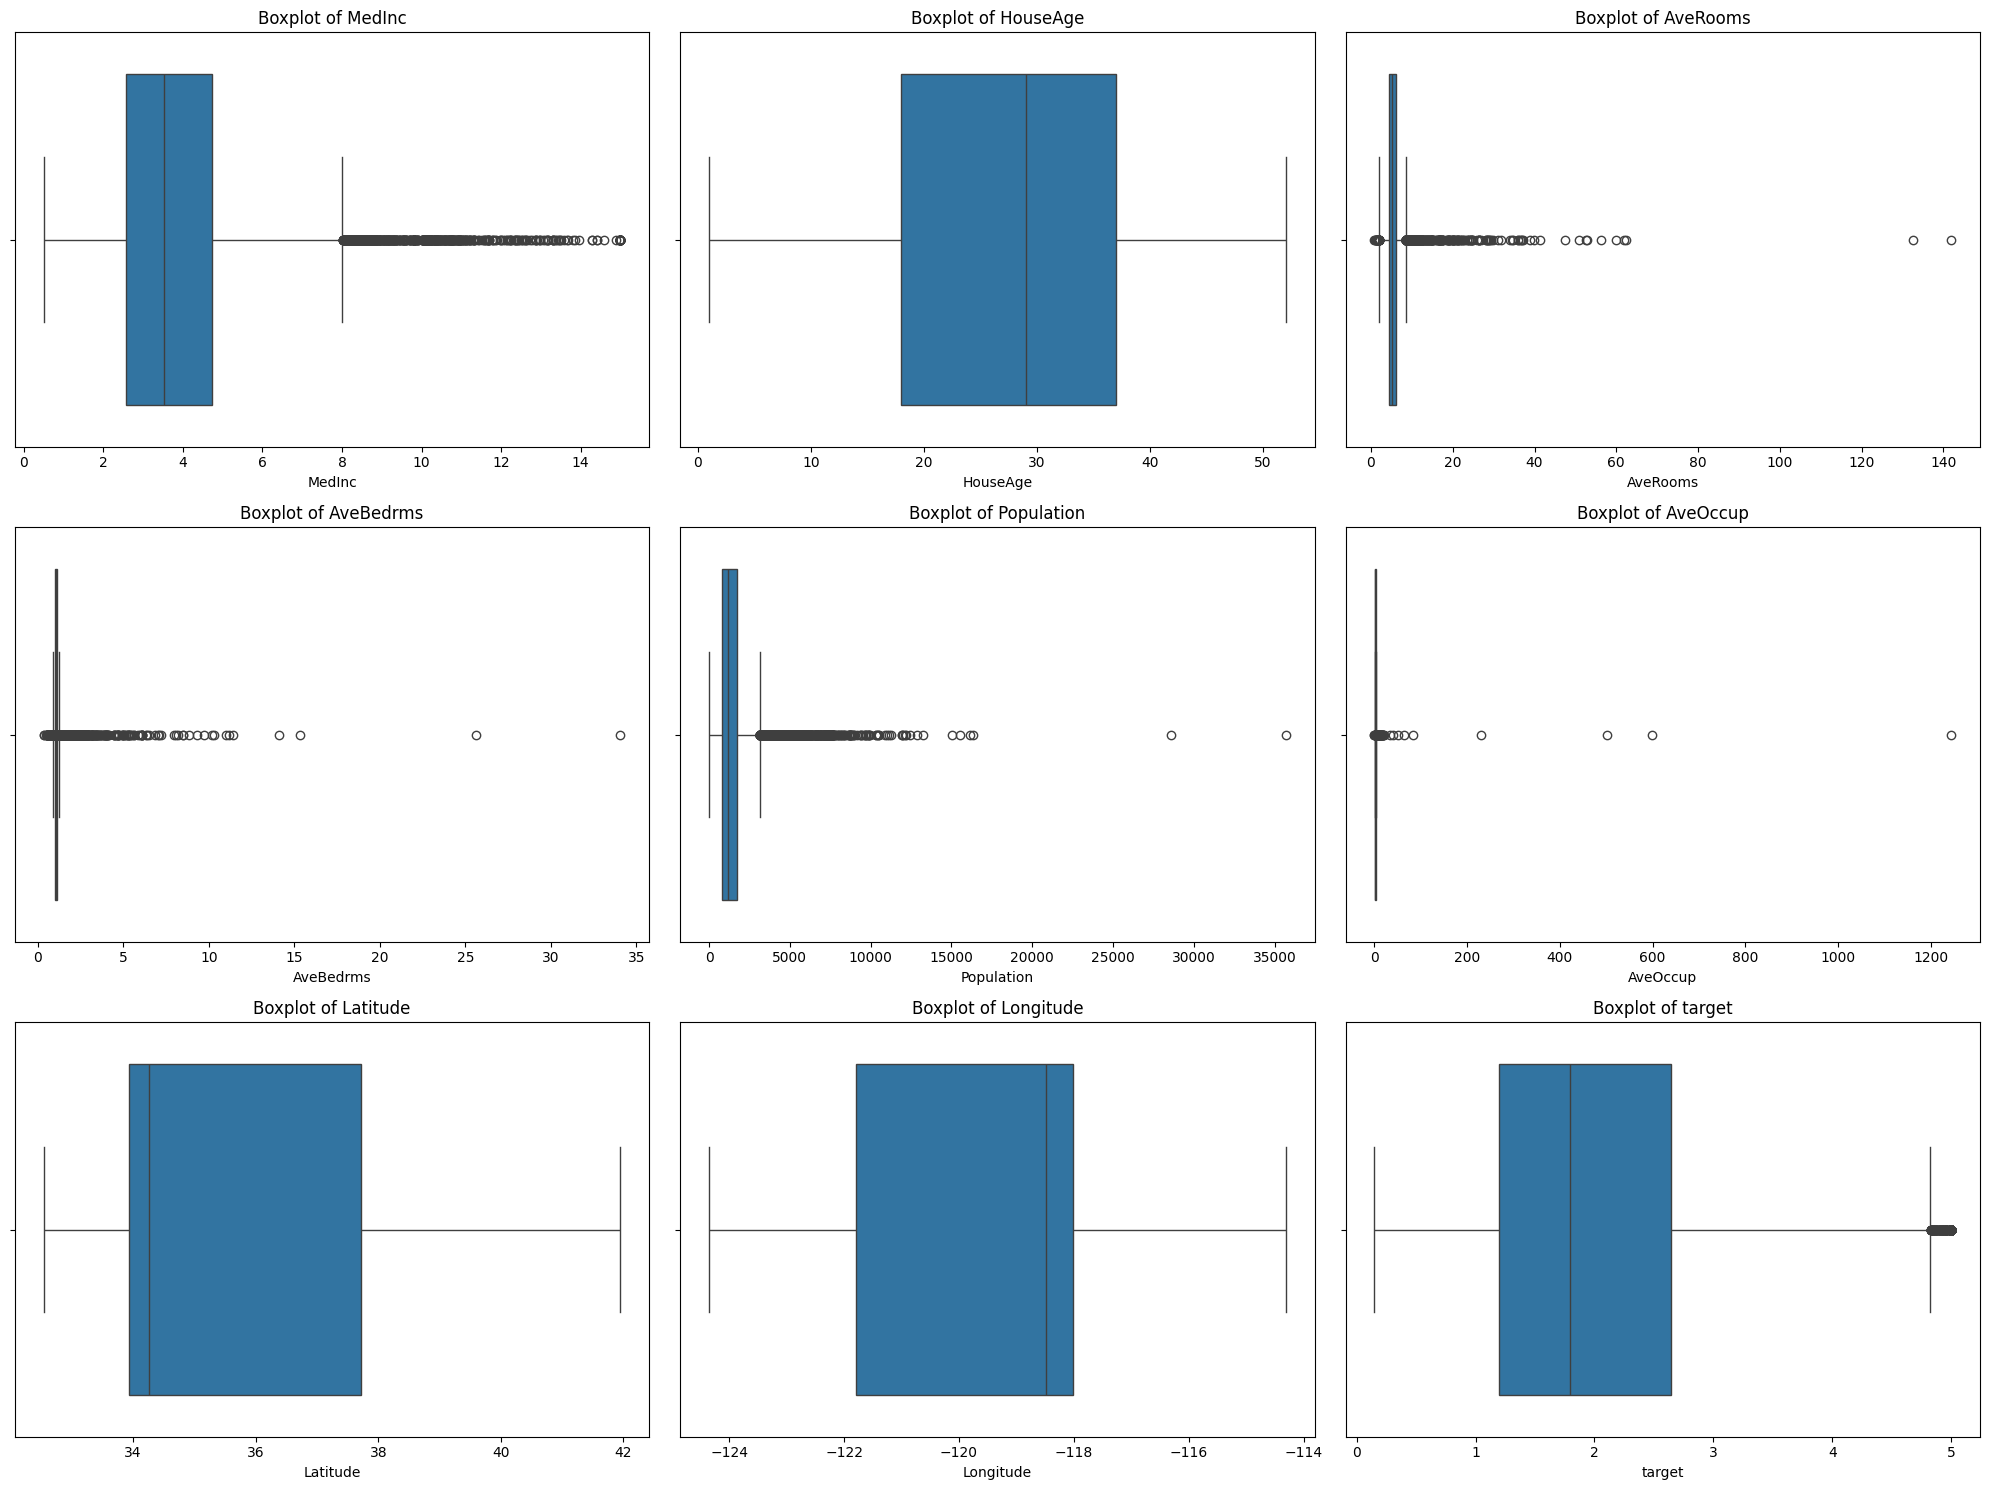

In [1]:
"""
Lab1: Data Exploration and Visualization
Housing Dataset Analysis
"""

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("housing.csv")


# Select numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
print(numerical_features)


# Outlier detection using IQR method
for feature in numerical_features:
    q1 = np.percentile(df[feature].dropna(), 25)
    q3 = np.percentile(df[feature].dropna(), 75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"\nFeature: {feature}")
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print(f"IQR: {IQR}")
    print(f"Outliers for {feature}:")
    print(f"Number of outliers: {len(outliers)}")

# Combined histogram plots in subplots
plt.figure(figsize=(20, 15))
num_features = len(numerical_features)
rows = (num_features + 2) // 3  # Calculate number of rows needed (3 plots per row)

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Combined boxplot plots in subplots
plt.figure(figsize=(20, 15))
num_features = len(numerical_features)
rows = (num_features + 2) // 3  # Calculate number of rows needed (3 plots per row)

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


Dataset Shape: (20640, 9)

Dataset Description:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532 

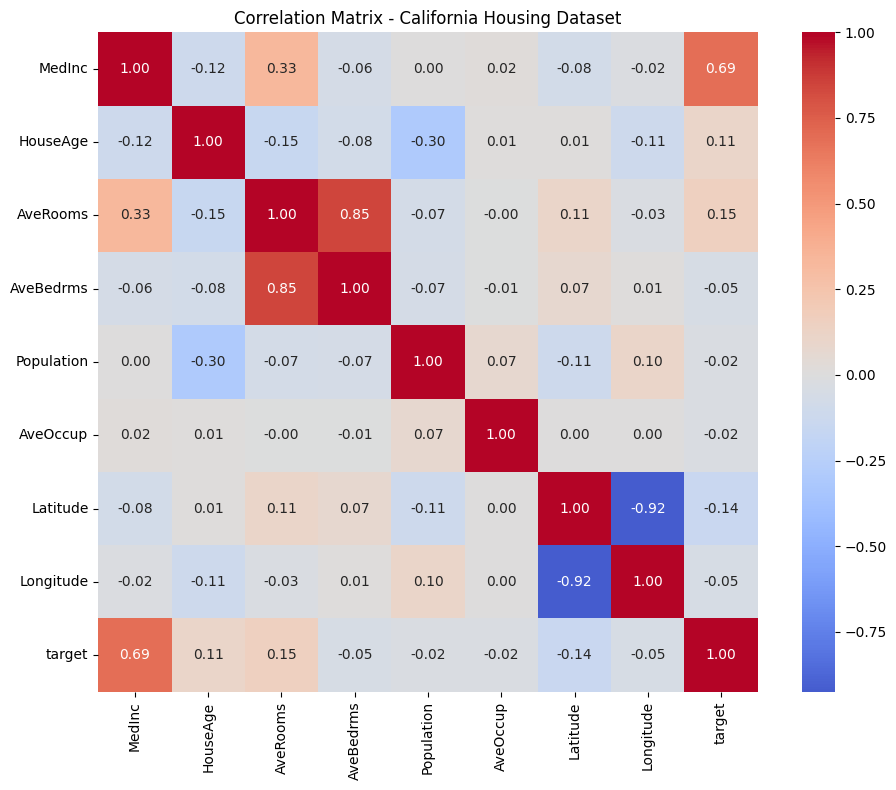

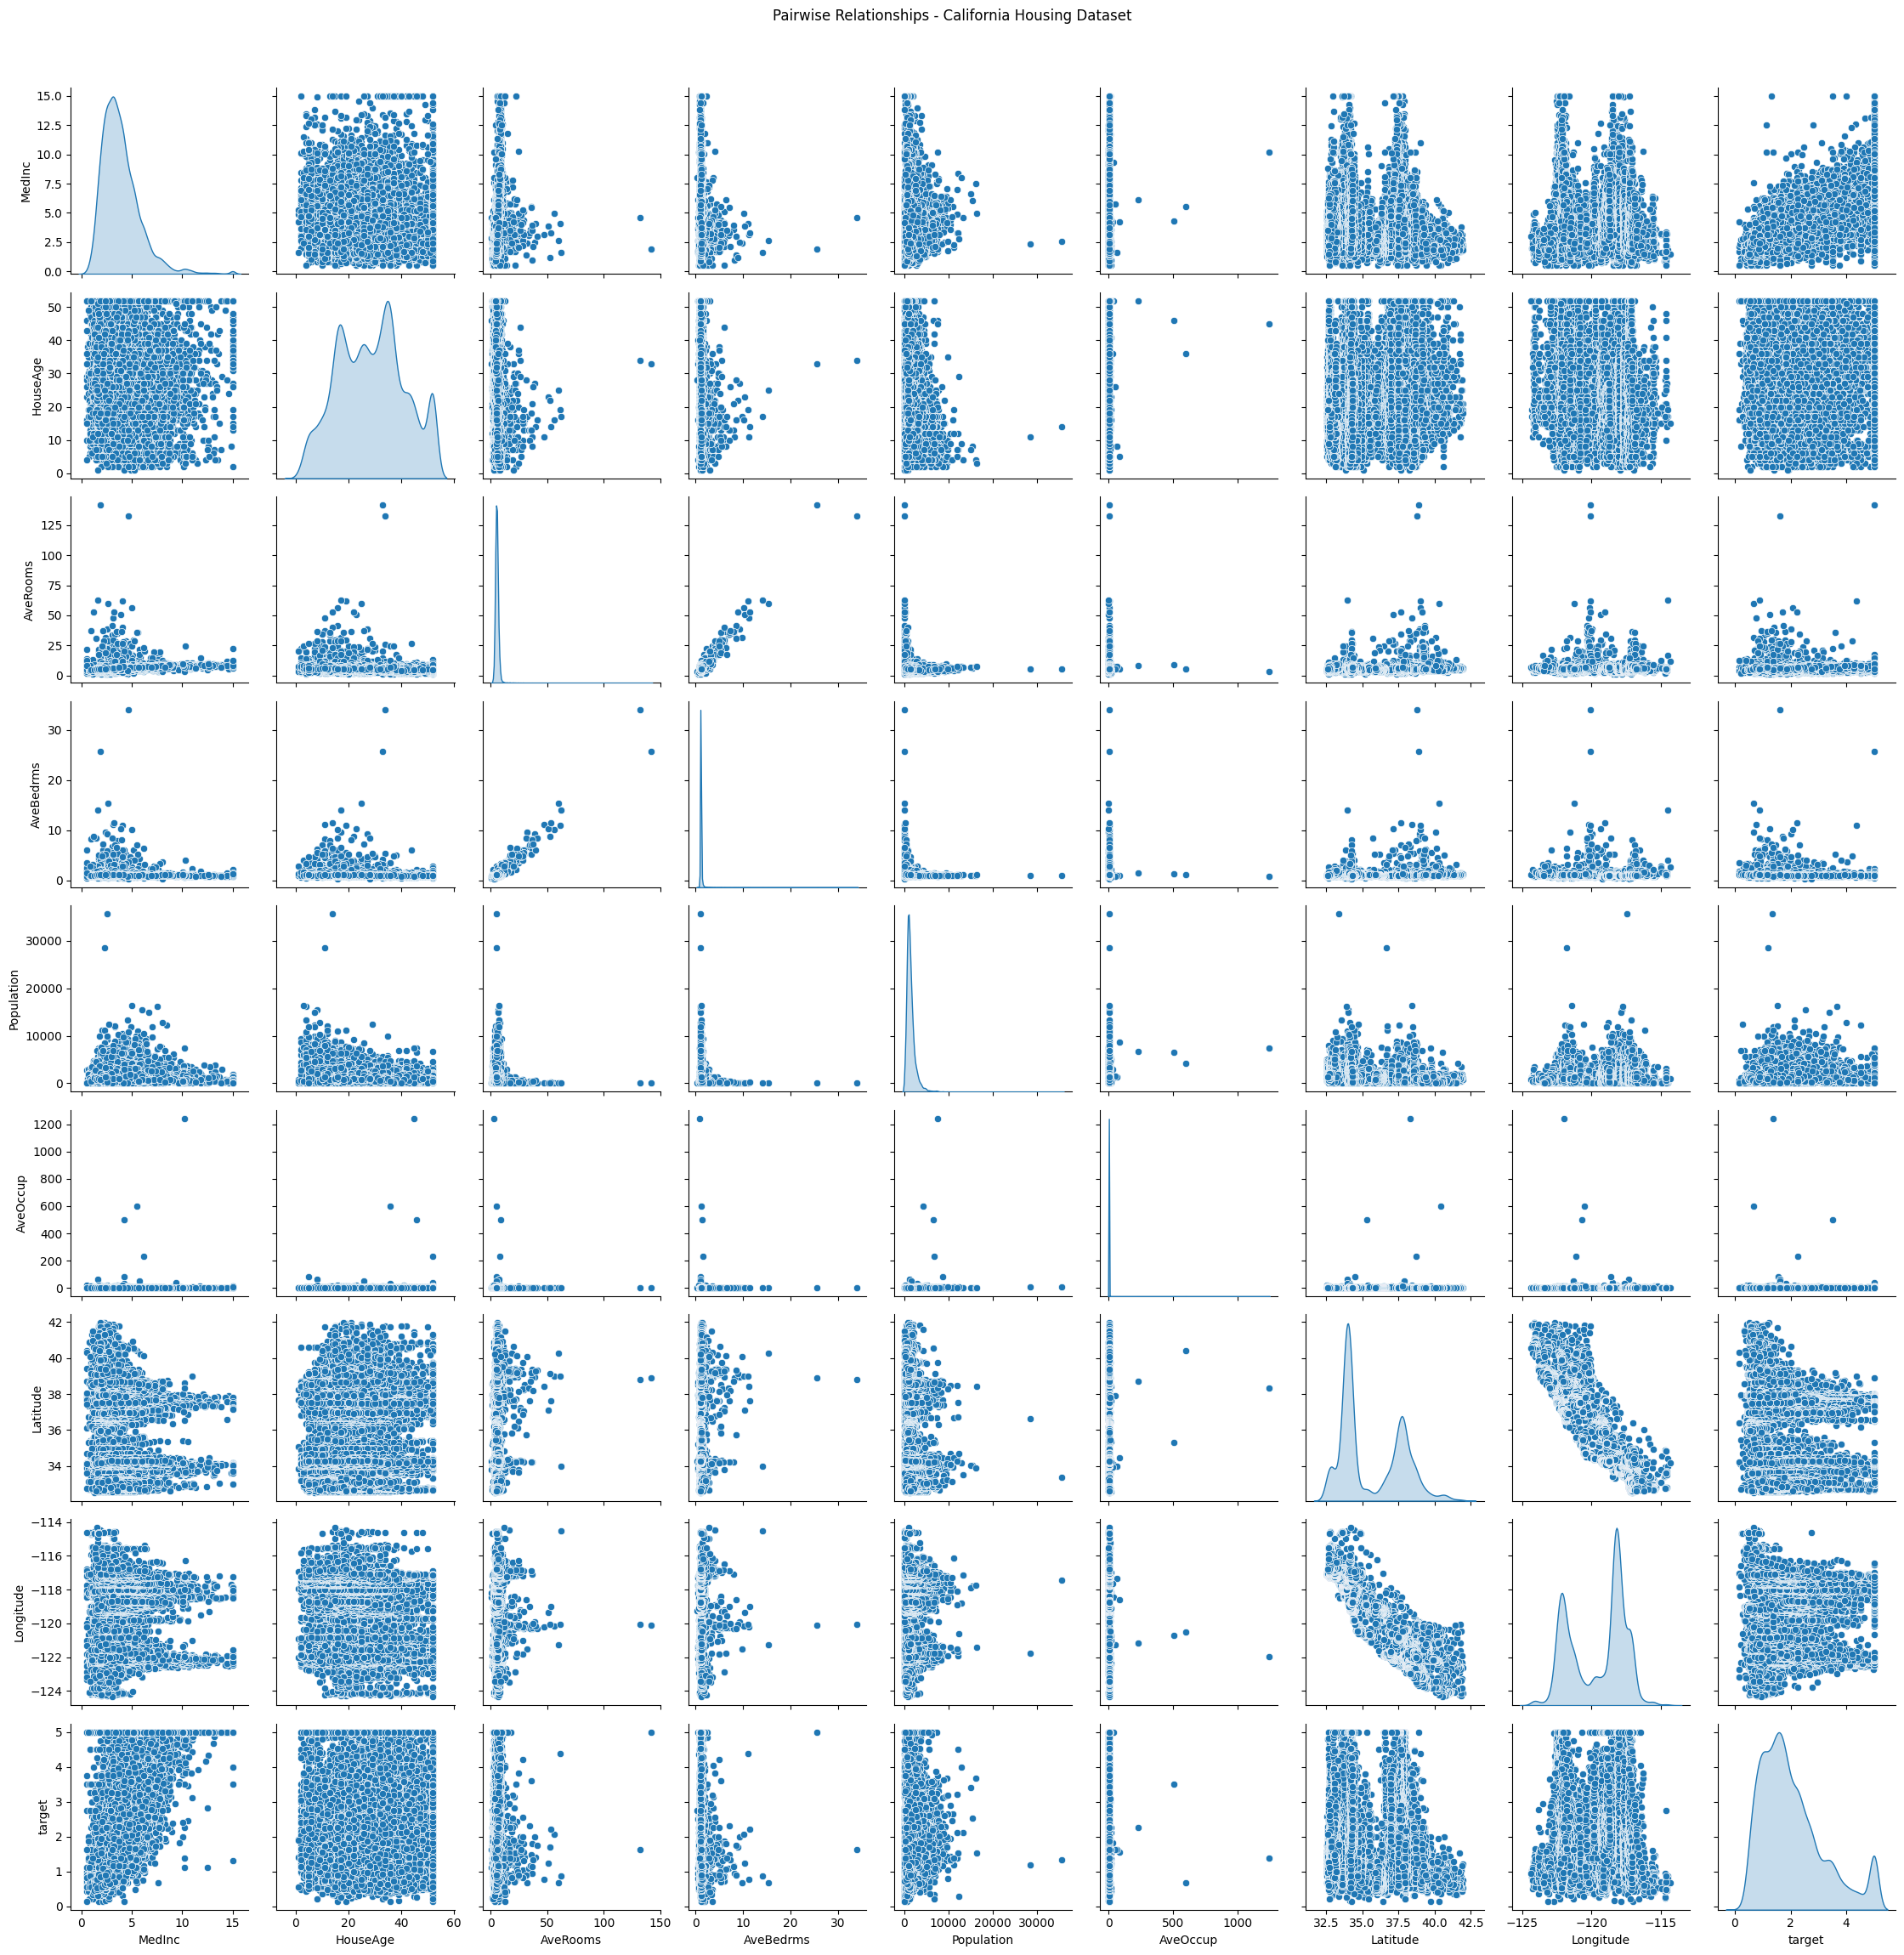

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load California Housing dataset
df = pd.read_csv("housing.csv")

# Basic dataset information
print(f"Dataset Shape: {df.shape}")
print(f"\nDataset Description:")
print(df.describe())

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)
print(f"\nHighest correlations with target:")
print(corr_matrix['target'].sort_values(ascending=False))

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix - California Housing Dataset')
plt.tight_layout()
plt.show()

# Create pairplot to visualize pairwise relationships
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairwise Relationships - California Housing Dataset', y=1.02)
plt.tight_layout()
plt.show()


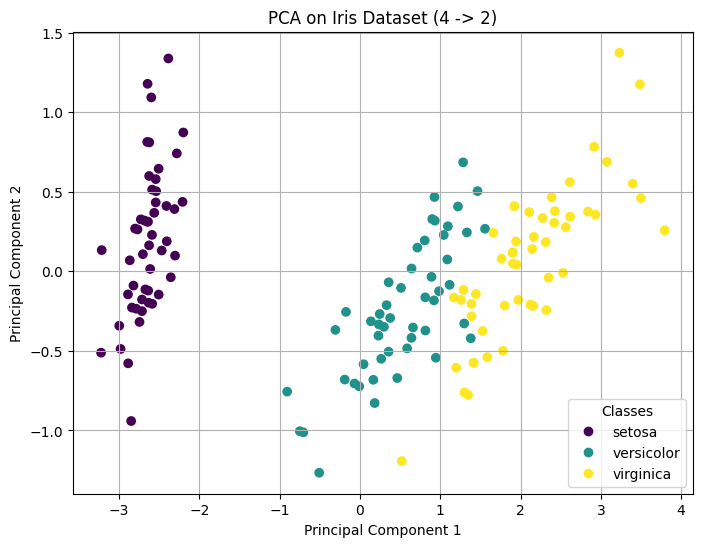

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data from CSV
iris = pd.read_csv('iris.csv')
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = pd.Categorical(iris['species']).codes

# Apply PCA and visualize
plt.figure(figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(X)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title("PCA on Iris Dataset (4 -> 2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Add legend with species names
handles, labels = scatter.legend_elements()
plt.legend(handles, iris['species'].unique(), title="Classes")
plt.grid()
plt.show()


In [6]:
import pandas as pd

# Load data
df = pd.read_csv('Lab4.csv')

# Find-S Algorithm
def find_s(df, target_col):
    positive_examples = df[df[target_col] == 'Yes']
    attributes = df.columns.tolist()
    attributes.remove(target_col)
    
    # Initialize with first positive example
    hypothesis = positive_examples.iloc[0][attributes].tolist()
    
    # Generalize hypothesis
    for _, example in positive_examples.iterrows():
        for i, attr in enumerate(attributes):
            if hypothesis[i] != example[attr]:
                hypothesis[i] = '?'
    
    return hypothesis

# Run algorithm
hypothesis = find_s(df, "Job offer")
print(hypothesis)



['>=9', 'Yes', '?', 'Good', '?', '?']


In [35]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data
values = np.random.rand(100)
labels = ["Class1" if x <= 0.5 else "Class2" for x in values[:50]] + [None] * 50

# Create DataFrame and split labeled/unlabeled data
df = pd.DataFrame({"Point": [f"x{i+1}" for i in range(100)], "Value": values, "Label": labels})
labeled, unlabeled = df[df["Label"].notna()], df[df["Label"].isna()]

# Prepare training and test data
X_train, y_train = labeled[["Value"]], labeled["Label"]
X_test = unlabeled[["Value"]]
true_labels = ["Class1" if x <= 0.5 else "Class2" for x in values[50:]]

# Test different k values and evaluate
for k in [1, 2, 3, 4, 5, 20, 30]:
    predictions = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(true_labels, predictions) * 100
    print(f"Accuracy for k={k}: {accuracy:.2f}%")


Accuracy for k=1: 94.00%
Accuracy for k=2: 94.00%
Accuracy for k=3: 94.00%
Accuracy for k=4: 100.00%
Accuracy for k=5: 94.00%
Accuracy for k=20: 82.00%
Accuracy for k=30: 84.00%


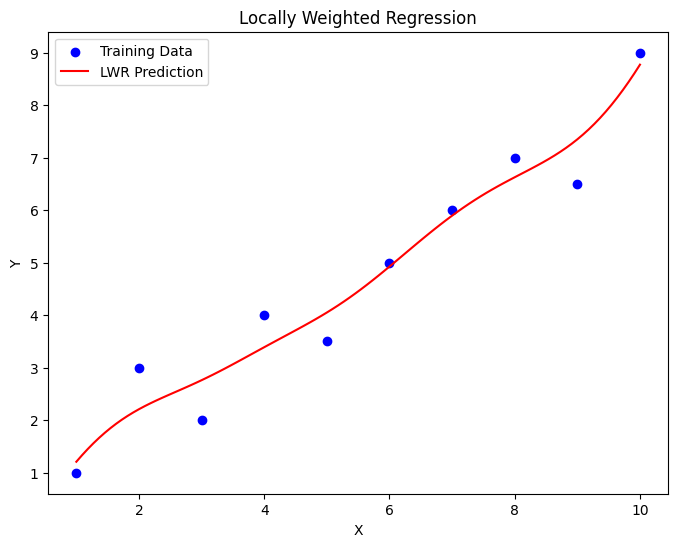

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x, x_query, tau):
    return np.exp(-(x - x_query)**2 / (2 * tau**2))

def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones((len(X))), X]
    x_query_b = np.array([1, x_query])
    W = np.diag(gaussian_kernel(X, x_query, tau))
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    return x_query_b @ theta

# Generate data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 9])

# Create predictions
X_query = np.linspace(1, 10, 100)
tau = 1.0
y_lwr = np.array([locally_weighted_regression(X, y, xq, tau) for xq in X_query])

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_query, y_lwr, color='red', label='LWR Prediction')
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


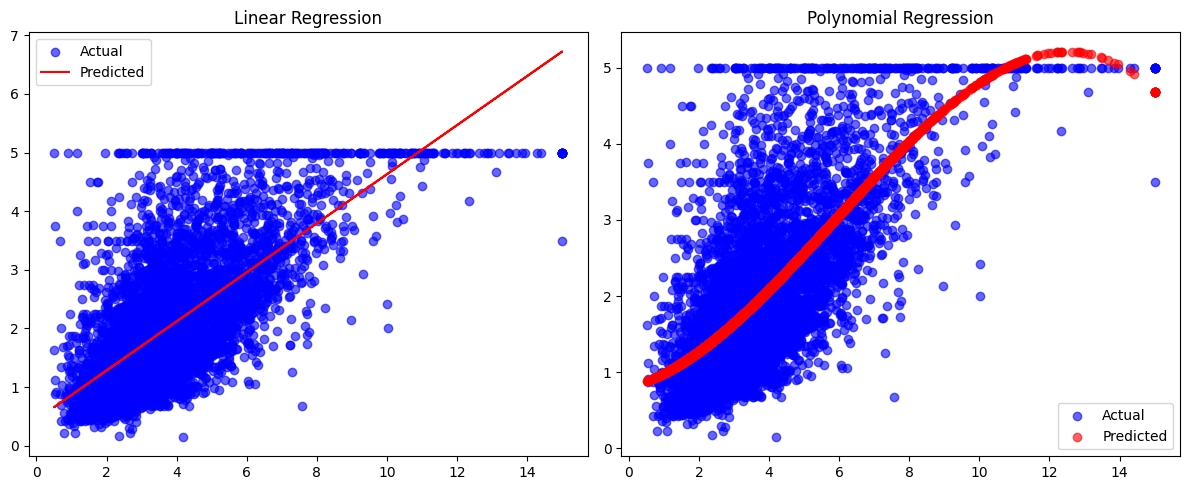

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Load data from CSV
data = pd.read_csv("housing.csv")
X, y = data[["MedInc"]], data["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
linear_pred = LinearRegression().fit(X_train, y_train).predict(X_test)
poly_pred = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X_train, y_train).predict(X_test)

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
ax1.plot(X_test, linear_pred, color='red', label='Predicted')
ax1.set_title('Linear Regression')
ax1.legend()

ax2.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
ax2.scatter(X_test, poly_pred, color='red', label='Predicted', alpha=0.6)
ax2.set_title('Polynomial Regression')
ax2.legend()

plt.tight_layout()
plt.show()


Model accuracy: 94.74%
Predicted class for sample: Malignant


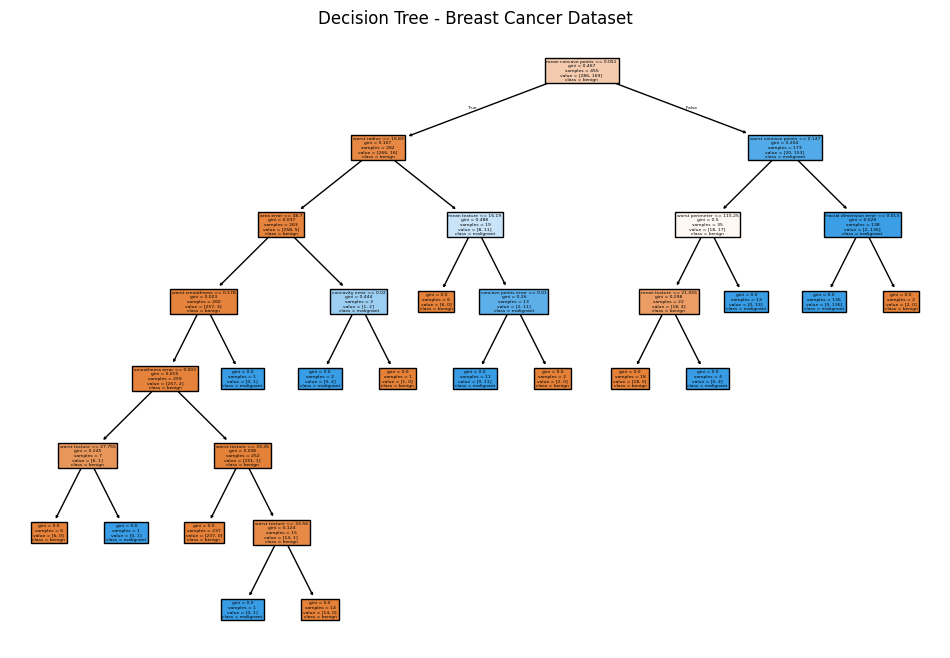

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Load data and prepare features/target
data = pd.read_csv("breast_cancer.csv")
X, y = data.drop('diagnosis', axis=1), data['diagnosis']

# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# Evaluate model
accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f"Model accuracy: {accuracy*100:.2f}%")

# Make prediction on sample
prediction_class = "Benign" if clf.predict([X_test.iloc[0]]) == 1 else "Malignant"
print(f"Predicted class for sample: {prediction_class}")

# Visualize decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=sorted(y.unique()))
plt.title("Decision Tree - Breast Cancer Dataset")
plt.show()

Accuracy of Naive Bayes Classifier on Olivetti faces dataset: 83.75%


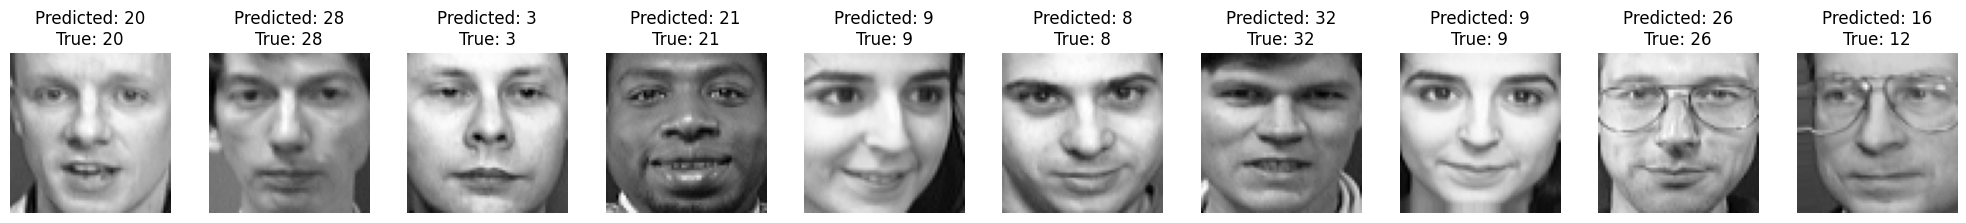

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load faces data
faces_df = pd.read_csv('faces.csv')
x = faces_df.drop('person_id', axis=1).values
y = faces_df['person_id'].values

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Train Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes Classifier on Olivetti faces dataset: {accuracy*100:.2f}%")

# Display sample faces with predictions
n_samples = 10
plt.figure(figsize=(20, 4))

for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(x_test[i].reshape(64, 64), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean radius, Length: 569, dtype: float64
0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: mean texture, Length: 569, dtype: float64


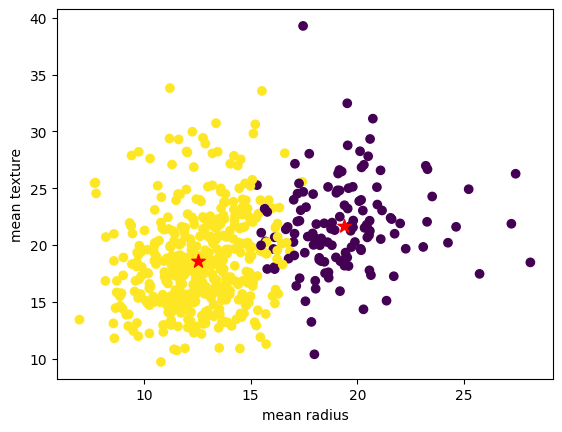

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv("breast_cancer.csv")

df = data.copy()
x = df.iloc[:, 0:-1]

kmeans = KMeans(n_clusters=2, random_state=42).fit(x)

pred = kmeans.predict(x)

print(x.iloc[:, 0])
print(x.iloc[:, 1])

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=pred, cmap="viridis", marker="o")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100,
    c="red",
    marker="*",
)

plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()
